<a href="https://colab.research.google.com/github/Binu-Getachew/ML-Projects/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Dataset: Blobs
single     linkage → Silhouette Score: 0.855
complete   linkage → Silhouette Score: 0.855
average    linkage → Silhouette Score: 0.855
ward       linkage → Silhouette Score: 0.855


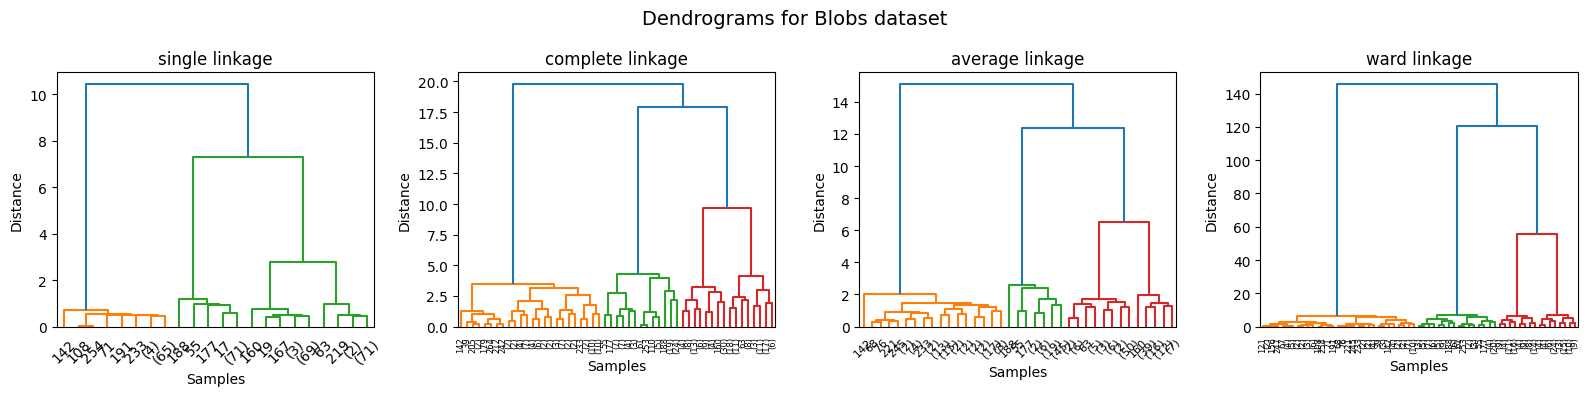


### Dataset: Moons
single     linkage → Silhouette Score: -0.198
complete   linkage → Silhouette Score: 0.383
average    linkage → Silhouette Score: 0.442
ward       linkage → Silhouette Score: 0.395


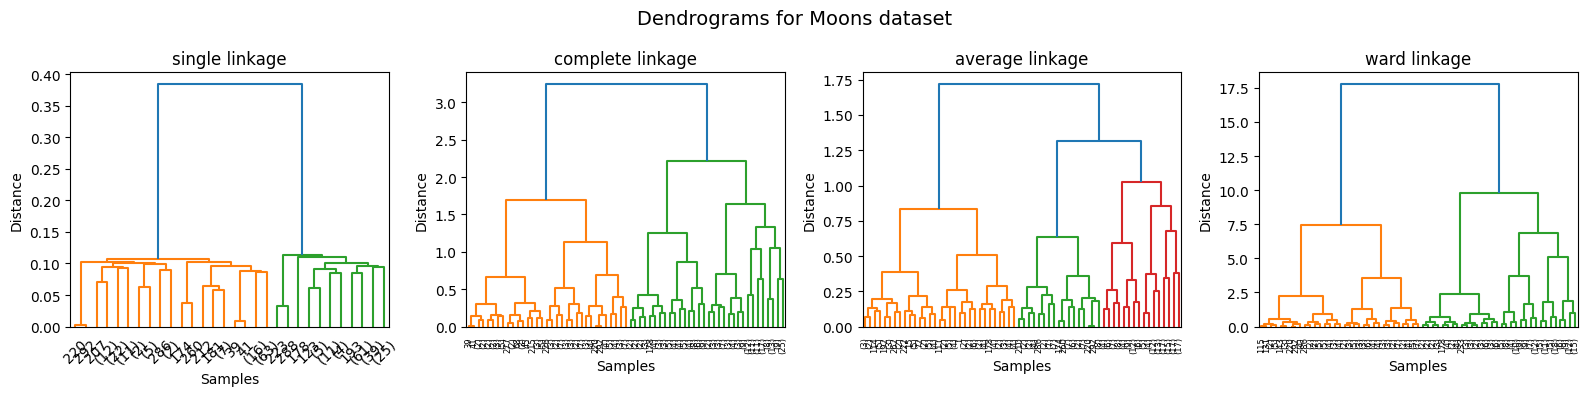

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Create multiple feature spaces (datasets)
datasets = {
    "Blobs": make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)[0],
    "Moons": make_moons(n_samples=300, noise=0.05, random_state=42)[0]
}

linkage_methods = ['single', 'complete', 'average', 'ward']

# 2. Analyze each dataset and linkage type
for name, X in datasets.items():
    print(f"\n### Dataset: {name}")
    fig, axes = plt.subplots(1, len(linkage_methods), figsize=(16, 4))

    for i, method in enumerate(linkage_methods):
        try:
            # 3. Fit Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=4, linkage=method)
            labels = model.fit_predict(X)

            # 4. Compute Silhouette Score
            sil = silhouette_score(X, labels)
            print(f"{method:10s} linkage → Silhouette Score: {sil:.3f}")

            # 5. Plot Dendrogram
            linked = linkage(X, method=method)
            dendrogram(linked, truncate_mode='level', p=5, ax=axes[i])
            axes[i].set_title(f"{method} linkage")
            axes[i].set_xlabel("Samples")
            axes[i].set_ylabel("Distance")
        except Exception as e:
            axes[i].text(0.5, 0.5, str(e), ha='center', va='center')

    plt.suptitle(f"Dendrograms for {name} dataset", fontsize=14)
    plt.tight_layout()
    plt.show()
